In [1]:
# print_function for compatibility with Python 3
from __future__ import print_function

# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns', 100)

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Load employee data from CSV
data = pd.read_csv('C:\\Users\\User\\Desktop\\relaytrain_2Clean.csv')
data.head()

,custid,retained,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep,dayFav,City2
0,H6VU43,0,0,0.000000,0.0,16.63,0.085868,0,0,0,5,2
1,ADDA9E,0,0,0.000000,0.0,0.50,0.000000,0,0,0,2,1
2,8JDHBB,0,0,0.000000,0.0,3.27,0.000000,0,0,0,5,2
3,JYKMRY,1,16,0.000000,0.0,30.61,0.019608,0,0,0,5,1
4,3WNZ25,1,45,6.666667,0.0,10.36,0.000000,0,0,0,5,1


In [3]:
#Find blanks in data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24549 entries, 0 to 24548
Data columns (total 12 columns):
custid        24549 non-null object
retained      24549 non-null int64
esent         24549 non-null int64
eopenrate     24549 non-null float64
eclickrate    24549 non-null float64
avgorder      24549 non-null float64
ordfreq       24549 non-null float64
paperless     24549 non-null int64
refill        24549 non-null int64
doorstep      24549 non-null int64
dayFav        24549 non-null int64
City2         24549 non-null int64
dtypes: float64(4), int64(7), object(1)
memory usage: 2.2+ MB


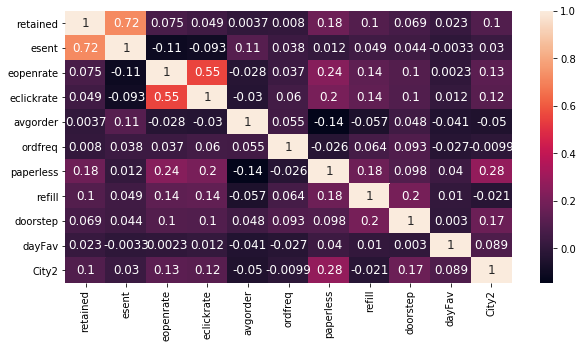

In [4]:
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(10,5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [5]:
data.pop('custid')
data.head()

,retained,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep,dayFav,City2
0,0,0,0.000000,0.0,16.63,0.085868,0,0,0,5,2
1,0,0,0.000000,0.0,0.50,0.000000,0,0,0,2,1
2,0,0,0.000000,0.0,3.27,0.000000,0,0,0,5,2
3,1,16,0.000000,0.0,30.61,0.019608,0,0,0,5,1
4,1,45,6.666667,0.0,10.36,0.000000,0,0,0,5,1


In [6]:
# Load employee data from CSV
data2 = pd.read_csv('C:\\Users\\User\\Desktop\\relaytest_2Clean.csv')
data2.pop('custid')
data2.head()

,retained,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep,dayFav,City2
0,1,31,9.677419,0.000000,40.02,0.000000,1,0,0,2,2
1,0,26,19.230769,7.692308,40.02,0.000000,1,1,0,7,3
2,1,33,66.666667,3.030303,84.90,0.111765,0,0,1,5,3
3,1,31,19.354839,6.451613,46.16,0.000000,1,1,0,5,1
4,1,45,6.666667,2.222222,74.31,0.069767,1,0,0,5,2


# Logistic Model

In [7]:
from sklearn.model_selection import train_test_split 
#train, test = train_test_split(data, test_size = 0.25)
 
train_y = data['retained']
test_y = data2['retained']
 
train_x = data.drop('retained', axis=1)
test_x = data2.drop('retained', axis=1)


Intercept: [-2.90913258]
Regression: [[ 0.21225012  0.00602875  0.01330029 -0.00339118 -0.56702976  0.37095351
   0.72266755  0.82879788  0.08640724 -0.01947795]]
Accuracy of logistic regression classifier on test set: 0.9430
             precision    recall  f1-score   support

          0       0.88      0.83      0.86      1281
          1       0.96      0.97      0.96      4927

avg / total       0.94      0.94      0.94      6208



Text(0.5,15,'Predicted label')

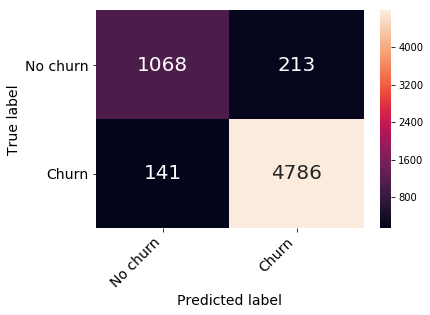

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
 
logisticRegr = LogisticRegression()
logisticRegr.fit(X=train_x, y=train_y)
 
test_y_pred = logisticRegr.predict(test_x)
confusion_matrix = confusion_matrix(test_y, test_y_pred)
print('Intercept: ' + str(logisticRegr.intercept_))
print('Regression: ' + str(logisticRegr.coef_))
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(logisticRegr.score(test_x, test_y)))
print(classification_report(test_y, test_y_pred))
 
confusion_matrix_df = pd.DataFrame(confusion_matrix, ('No churn', 'Churn'), ('No churn', 'Churn'))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)

Accuracy : (True Positive / True Negatives) / total

Precision : True Positive / Test Positives

Recall : True Positives / Actual Positives

FI Score = 2(precisionRecall)/SUM(precision+ Recall)

FI will be close to 1 when precision and recal are close to 1, FI is good way to make sure both precision and recall are good


## XGBoost 

In [9]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [10]:
#Load Data
train_y = data['retained']
test_y = data2['retained']
 
train_x = data.drop('retained', axis=1)
test_x = data2.drop('retained', axis=1)

In [12]:
model = XGBClassifier()
model.fit(train_x,train_y)
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


In [13]:
predictions = model.predict(test_x)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [15]:
accuracy = accuracy_score(test_y, predictions)
print("Accuracy: %.4f%%" % (accuracy * 100.00))

Accuracy: 95.6347%


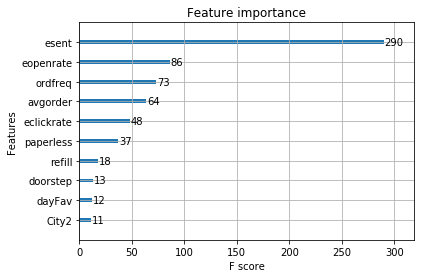

In [20]:
from xgboost import plot_importance
plot_importance(model)
pyplot.show()

In [26]:
from numpy import sort
from sklearn.feature_selection import SelectFromModel
thresholds= sort(model.feature_importances_)

for thresh in thresholds:
    #select features
    selection = SelectFromModel(model,threshold=thresh, prefit=True)
    select_X_train = selection.transform(train_x)
    #Trainmodel
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, train_y)
    #evaluate Model
    select_X_test = selection.transform(test_x)
    predictions = selection_model.predict(select_X_test)
    accuracy = accuracy_score(test_y, predictions)
    print("Thresh=%.4f, n=%d, Accuracy: %.4f%%" % (thresh, select_X_train.shape[1], accuracy*100.00))

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.0169, n=10, Accuracy: 95.6347%


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.0184, n=9, Accuracy: 95.6669%


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.0199, n=8, Accuracy: 95.6024%


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.0276, n=7, Accuracy: 95.6830%


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.0567, n=6, Accuracy: 95.5541%


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.0736, n=5, Accuracy: 95.5058%


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.0982, n=4, Accuracy: 95.2964%


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.1120, n=3, Accuracy: 95.1031%


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.1319, n=2, Accuracy: 95.0064%
Thresh=0.4448, n=1, Accuracy: 94.6843%


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# Overfitting Prevention

Since XGBOOST uses a gradient boosted decision tree algortithm, the models factor weights and thresholds are added suequentially 
untill no further imporvments have been made. Essentially the Residuals or errors are used from prior models then added together
to make a final prediction. the Boost minimizes loss